In [1]:
import matplotlib.pyplot as plt
import numpy as np
def Display(count,size, FileName,**kwargs):
    """ This Function is to Display the data sets in scatter plot 
    
    Syntax:
    
    
    Disply(size,Dataset_Name = Dataset_value ,...)
    Size will be around 0.1 to 20
    DataSetName is the Name of the DataSet which will be displayed as legend
    Dataset_value in numpy Array in 2D
    """
    
    fig = plt.figure(count, figsize=(20,15))
    ax1 = fig.add_subplot(111)
    
    #print("formal arg:", farg)
    #for key in kwargs:
    colour = ['r','g','b','orange','y','cy']
    count = 0
    
    for key in kwargs:
        #print("another keyword arg: %s: %s" %(key, kwargs[key]))
        #print(kwargs)
        Lon_Lat = kwargs[key]
        Lon = Lon_Lat[:,1]
        Lat = Lon_Lat[:,0]
        ax1.scatter(Lon,Lat,label = key,color = colour[count],s=size)
        plt.xlabel('Longititude')
        plt.ylabel('Latitude')
        plt.title(FileName)
        plt.legend()
        count = count+1
        plt.savefig(FileName+".jpg")
        #print(count)


In [2]:
from numpy import genfromtxt
True_center_alt = genfromtxt('True_Cluster_Centers_Forest.csv', delimiter=',')
True_LAT_LON = genfromtxt('True_Cluster_Centers_Roadways.csv',delimiter = ',')
print(True_center_alt.shape)
print(True_LAT_LON.shape)

(1431, 3)
(319, 2)


### True Center Alt Copy

In [3]:
True_center_alt_copy = True_center_alt.copy()
True_LAT_LON_copy = True_LAT_LON.copy()

In [4]:
True_center_alt

array([[    9.79158,    77.63311,   362.62   ],
       [    9.70994,    77.71264,   226.19   ],
       [    9.78595,    77.61363,   471.87   ],
       ..., 
       [    9.69605,    77.68603,   392.59   ],
       [    9.73214,    77.68337,  1117.41   ],
       [    9.67656,    77.54058,   456.08   ]])

### Backup

In [5]:
True_center_alt = True_center_alt_copy.copy()
True_center_alt.shape

(1431, 3)

In [6]:
True_center_alt.shape


(1431, 3)

In [ ]:
Display(count =1,size =10,FileName ="True_Centroids.jpg",RoadWay = True_LAT_LON,Forest_Center = True_center_alt)

### LAT = 9.7 LON=77.48 Alt=100
### LAT = 9.73 LON = 77.68 Alt =100

In [ ]:
Test_LAT = float(input())
Test_Lon = float(input())
Test_Alt = float(input())
Unknown_point = np.array([Test_LAT,Test_Lon,Test_Alt])
Path_Distance_Measure = 0
StartingPoint = Unknown_point.copy()

In [7]:
import math as m
def rad(x):
    return ((m.pi*x)/180)

rad(a[0])

### Finding Target Point from Unknown Point

### Harversine Distance Formula


In [8]:
def Haversine(CenterLAT_LON_Points,Target_Point):
    R = 6378137
    top = 10
    dLat = rad(CenterLAT_LON_Points[:,0]) - rad(Target_Point[0]);
    dLon = rad(CenterLAT_LON_Points[:,1]) - rad(Target_Point[1]);
    #print(dLat)
    #print(dLon)
    aa = np.sin(dLat / 2) * np.sin(dLat / 2) + np.cos(rad(CenterLAT_LON_Points[:,0]))*np.cos(rad(Target_Point[0]))*np.sin(dLon / 2)*np.sin(dLon / 2);
    c = 2 *np.arctan2(np.sqrt(aa),np.sqrt(1-aa));
    distance = R * c
    #print(distance)
    dis_index = distance.argsort()
    #print(type(CenterLAT_LON_Points))
    distance = np.array([round(float(i),2) for i in distance[dis_index]])
    #return(CenterLAT_LON_Points[dis_index][0],distance[0])
    #return(CenterLAT_LON_Points[dis_index][0:top],distance[0:top])
    return(dis_index,distance)

    #print(dis_index)

### Backup_ClusterCenters

In [25]:
True_center_alt = True_center_alt_copy.copy()
print(True_center_alt.shape)
Distance_Array = np.array([])
points = np.array([])
Unknown_point = np.array([9.75,77.7,100])
StartingPoint = Unknown_point.copy()

(1431, 3)


In [18]:
StartingPoint

array([   9.7 ,   77.67,  100.  ])

### Pythogorus Theorem


In [13]:
def hypo(x,y):
    return(np.floor(np.sqrt(np.square(x) + np.square(y))))

### Around 10 Km Points

In [14]:
def Top_Around_10KM(distance):
    Around = 10;
    Top = distance[0]
    for i in range(1,distance.shape[0]):
        if(np.abs(Top - distance[i])<Around):
            #Top = np.append(Top,distance[i])
            Top = distance[i]
            #count = i
        else:
            #print(i)
            break
    return(i)
#print(Top_Around_10KM(Distance))


### Filtering Points Lies between Target and Test Points Quarderants

In [15]:
def Filtering(Test_LAT_LON_Alt,Top_Target_Points,True_Center_alt):
    """Argument 1 Unknown Position, Argument 2 Top Target Points to Reach, Argument 3 True Center Points"""
    #Filter_points = True_Center_alt
    [x,y] = Test_LAT_LON_Alt[0:2] - Top_Target_Points[0]
    #print(x,y)
    if(x>0):
        Filter_points = True_Center_alt[True_Center_alt[:,0]<Test_LAT_LON_Alt[0]]
        #print(Filter_points.shape)
        if(y>0):
            Filter_points = Filter_points[Filter_points[:,1]>Test_LAT_LON_Alt[1]]
        else:
            Filter_points = Filter_points[Filter_points[:,1]<Test_LAT_LON_Alt[1]]
    if(x<0):
        Filter_points = True_Center_alt[True_Center_alt[:,0]>Test_LAT_LON_Alt[0]]
        #print(Filter_points.shape)
        if(y>0):
            Filter_points = Filter_points[Filter_points[:,1]>Test_LAT_LON_Alt[1]]
        else:
            Filter_points = Filter_points[Filter_points[:,1]<Test_LAT_LON_Alt[1]]
    return(Filter_points)

### Copy

### Testing to determine opposite points

In [ ]:
Sortted_Index,Distance = Haversine(True_LAT_LON,Unknown_point)
Target_Point = True_LAT_LON[Sortted_Index[0]]
Target_Point

In [ ]:
Distance[0]

In [ ]:
Sortted_Index,Distance1 = Haversine(True_center_alt,Target_Point)
Distance1

In [ ]:
Unknown_point

In [ ]:
Display(count=1,size = 10, FileName = "Output_File",Cluster_Center = True_center_alt,RoadWay = True_LAT_LON)
plt.hold(True)
#fig1 = plt.figure(1, figsize=(15,12))
#ax = fig1.add_subplot(111)
#plt.plot(line_points_Lon,line_points_Lat,'*-',linewidth=2,markersize=10)
plt.text(Unknown_point[1],Unknown_point[0],'r**')
plt.text(Target_Point[1],Target_Point[0],'r**')
plt.savefig("OutputFile1.jpg")
plt.hold(False)

In [ ]:
Image_Target_Point = Target_Point.copy()

In [ ]:
I_Distance = Distance[0] * 2

In [ ]:
theta = np.arctan((Target_Point[1]-Unknown_point[1])/(Target_Point[0]-Unknown_point[0]))
theta

In [ ]:
np.arctan(1)

In [ ]:
theta1 = np.arctan((True_center_alt[:,1]-Target_Point[1])/(True_center_alt[:,0]-Target_Point[0]))

In [ ]:
a= (theta1 <= theta)
a.any()

In [ ]:
print(True_center_alt.shape)
Sortted_Index,Distance = Haversine(True_LAT_LON,Unknown_point)
print(Distance[0])
Target_Point = True_LAT_LON[Sortted_Index[0]]
#True_LAT_LON
points = np.append(points,Unknown_point)
#print(points)
#print(Unknown_point,Target_Point,True_center_alt.shape)
True_center_alt = Filtering(Unknown_point,Target_Point,True_center_alt)
#print(True_center_alt.shape)
Display(count=1,size = 10, FileName = "Output_File",Cluster_Center = True_center_alt,RoadWay = True_LAT_LON)   
    
#TO ENTER SOME MORE CODE FOR DETECTING ROADMAP LIES INSIDE FOREST REGION
    
    
    
    
Sortted_Index,Distance = Haversine(True_center_alt,Unknown_point)
top_center_cluster = True_center_alt[Sortted_Index[0:10]].copy()
elevation_distance = hypo(True_center_alt[Sortted_Index[0:10],2],Distance[0:10])
elevation_distance = elevation_distance.argsort()
Unknown_point = top_center_cluster[elevation_distance[0]]
Distance_Array = np.append(Distance_Array,hypo(points[-1],Unknown_point[-1]))


###  ---------------------------------------------Testing end---------------------------------------------

In [26]:

while(True_center_alt.shape[0]>10):
    Sortted_Index,Distance = Haversine(True_LAT_LON,Unknown_point)
    #print("Top 10 Roadway points\n",True_LAT_LON[Sortted_Index[0]])
    print(Distance[0])
    Target_Point = True_LAT_LON[Sortted_Index[0]]
    #True_LAT_LON
    points = np.append(points,Unknown_point)
    #print(points)
    #print(Unknown_point,Target_Point,True_center_alt.shape)
    True_center_alt = Filtering(Unknown_point,Target_Point,True_center_alt)
    #print(True_center_alt.shape)
    
    
    #TO ENTER SOME MORE CODE FOR DETECTING ROADMAP LIES INSIDE FOREST REGION
    
    
    
    
    Sortted_Index,Distance = Haversine(True_center_alt,Unknown_point)
    top_center_cluster = True_center_alt[Sortted_Index[0:10]].copy()
    elevation_distance = hypo(True_center_alt[Sortted_Index[0:10],2],Distance[0:10])
    elevation_distance = elevation_distance.argsort()
    Unknown_point = top_center_cluster[elevation_distance[0]]
    Distance_Array = np.append(Distance_Array,hypo(points[-1],Unknown_point[-1]))
   #Display(count=1,size = 10, FileName = "Output_File"+str(i),Cluster_Center = True_center_alt,RoadWay = True_LAT_LON)
    #print(Distance_Array[-1])

2622.92
791.85


In [27]:
Sortted_Index,Distance = Haversine(True_LAT_LON,StartingPoint)
#print("Top 10 Roadway points\n",True_LAT_LON[Sortted_Index[0]])
#print(Distance[0])
Target_Point = True_LAT_LON[Sortted_Index[0]]
#True_LAT_LO.shapeN
#print(points.shape)
points = np.append(points,Unknown_point)
#print(points.shape)
#points = np.append(points,Target_Point)    
points=points.reshape(int(points.shape[0]/3),3)
print("List of Points in between Unknown Points and Target Points\n",points)
print("Distance required to reach reach points in meter",Distance_Array)

List of Points in between Unknown Points and Target Points
 [[   9.75        77.7        100.       ]
 [   9.7671475   77.7031725  333.11     ]
 [   9.76746     77.7265575  268.21     ]]
Distance required to reach reach points in meter [ 347.  427.]


In [21]:
print("Target Point to Reach\n",Target_Point)


Target Point to Reach
 [  9.67647  77.67173]


In [22]:
#print(Haversine(Target_Point,Unknown_point))
Unknown_point[0]

9.6875699999999991

In [23]:
Distance_Array.shape

(6,)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


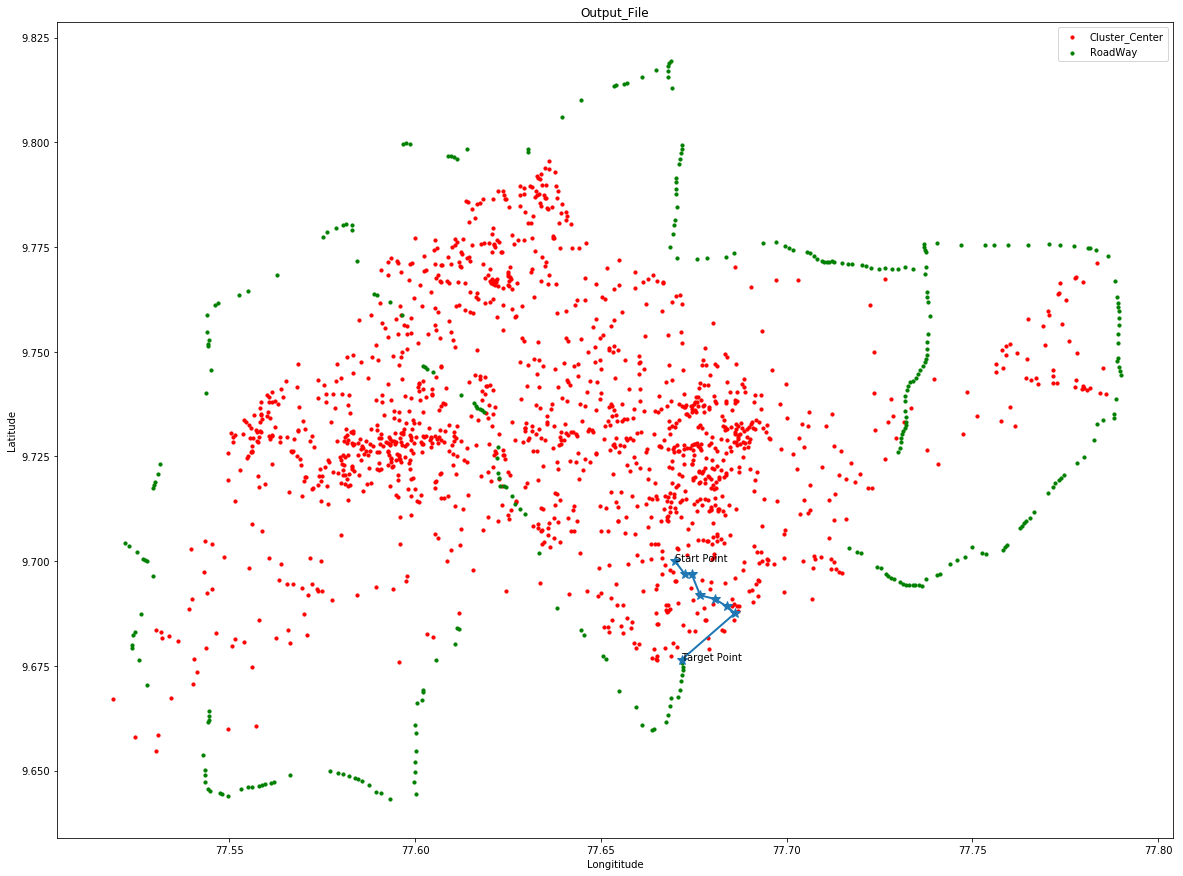

In [24]:
line_points_Lat = np.array([])
line_points_Lon = np.array([])
line_points_Lat = np.append(line_points_Lat,points[:,0])
#print(type(line_points_Lat))
line_points_Lat = np.append(line_points_Lat,Target_Point[0])
#print(line_points_Lat)
line_points_Lon = np.append(line_points_Lon,points[:,1])
line_points_Lon = np.append(line_points_Lon,Target_Point[1])
#print(line_points_Lon)
True_center_alt = True_center_alt_copy.copy()#Back up
#print(True_center_alt.shape)
import matplotlib.pyplot as plt


Display(count=1,size = 10, FileName = "Output_File",Cluster_Center = True_center_alt,RoadWay = True_LAT_LON)
plt.hold(True)
#fig1 = plt.figure(1, figsize=(15,12))
#ax = fig1.add_subplot(111)
plt.plot(line_points_Lon,line_points_Lat,'*-',linewidth=2,markersize=10)
plt.text(StartingPoint[1],StartingPoint[0],'Start Point')
plt.text(Target_Point[1],Target_Point[0],'Target Point')
plt.savefig("OutputFile1.jpg")
plt.hold(False)

In [28]:
Sortted_Index,Distance = Haversine(True_LAT_LON,Unknown_point)
print("Distance without elevation in meter :",Distance[0])
print("Distance with Elevation in meter :",np.sum(Distance_Array))

Distance without elevation in meter : 281.74
Distance with Elevation in meter : 774.0


In [ ]:
line_points_Lat = np.array([])
line_points_Lon = np.array([])
line_points_Lat = np.append(line_points_Lat,points[:,0])
#print(type(line_points_Lat))
line_points_Lat = np.append(line_points_Lat,Target_Point[0])
#print(line_points_Lat)
line_points_Lon = np.append(line_points_Lon,points[:,1])
line_points_Lon = np.append(line_points_Lon,Target_Point[1])
#print(line_points_Lon)
True_center_alt = True_center_alt_copy.copy()#Back up
#print(True_center_alt.shape)
import matplotlib.pyplot as plt


Display(count=1,size = 10, FileName = "Output_File_2",Cluster_Center = True_center_alt,RoadWay = True_LAT_LON)
plt.hold(True)
#fig1 = plt.figure(1, figsize=(15,12))
#ax = fig1.add_subplot(111)
plt.plot(line_points_Lon,line_points_Lat,'*-',linewidth=2,markersize=10)
plt.text(StartingPoint[1],StartingPoint[0],'Start Point')
plt.text(Target_Point[1],Target_Point[0],'Target Point')
plt.savefig("OutputFile1.jpg")
plt.hold(False)